In [1]:
# Importing necessary libraries/ packages 
import pandas as pd
import numpy as np

In [2]:
# Reading in the dataset
df = pd.read_csv('../data/all_songs_data_processed.csv')
df.head(2)

,Album,Album URL,Artist,Featured Artists,Lyrics,Media,Rank,Release Date,Song Title,Song URL,Writers,Year,Verbs,Nouns,Adverbs,Corpus,Word Counts,Unique Word Counts
0,Battle of New Orleans,https://genius.com/albums/Johnny-horton/Battle...,Johnny Horton,[],In 1814 we took a little trip Along with Colo...,[{'native_uri': 'spotify:track:0dwpdcQkeZqpuoA...,1,1959-04-01,The Battle Of New Orleans,https://genius.com/Johnny-horton-the-battle-of...,"[{'api_path': '/artists/561913', 'header_image...",1959.0,take take take catch fire keep be be fire begi...,trip bacon bean town gun comin while river of'...,along as ago once more so as ago once more the...,take little trip Colonel Jackson mighty Missis...,435,155
1,That’s All,https://genius.com/albums/Bobby-darin/That-s-all,Bobby Darin,[],"Oh the shark, babe Has such teeth, dear And he...",[{'native_uri': 'spotify:track:3E5ndyOfO6vFDEI...,2,NaN,Mack The Knife,https://genius.com/Bobby-darin-mack-the-knife-...,"[{'api_path': '/artists/218851', 'header_image...",1959.0,have show have keep know bite billow spread be...,shark babe tooth jackknife babe sight shark to...,pearly just so never never now just just down ...,oh shark babe tooth dear show pearly white jac...,224,145


In [3]:
# Cleaning the dataset

# Dropping lyrics with just instrumental
df = df.loc[df['Lyrics'].str.lower() != 'instrumental']

# Tranforming the 'Year' column into integer values 
df['Year'] = df['Year'].astype(int)

# Keeping only the necessary columns
df = df[['Album', 'Artist', 'Lyrics', 'Rank', 'Song Title', 'Year', 'Nouns','Adverbs','Corpus','Word Counts','Unique Word Counts']]
df.head()

,Album,Artist,Lyrics,Rank,Song Title,Year,Nouns,Adverbs,Corpus,Word Counts,Unique Word Counts
0,Battle of New Orleans,Johnny Horton,In 1814 we took a little trip Along with Colo...,1,The Battle Of New Orleans,1959,trip bacon bean town gun comin while river of'...,along as ago once more so as ago once more the...,take little trip Colonel Jackson mighty Missis...,435,155
1,That’s All,Bobby Darin,"Oh the shark, babe Has such teeth, dear And he...",2,Mack The Knife,1959,shark babe tooth jackknife babe sight shark to...,pearly just so never never now just just down ...,oh shark babe tooth dear show pearly white jac...,224,145
2,“Mr Personality’s” 15 Big Hits,Lloyd Price,Over and over I tried to prove my love to you ...,3,Personality,1959,love friend fool fool personality personality ...,over over over over over over so over now over...,try prove love friend say fool fool cause get ...,215,55
3,The Greatest Hits Of Frankie Avalon,Frankie Avalon,"Hey, Venus! Oh, Venus! Venus, if you will Ple...",4,Venus,1959,girl girl kiss arm girl charm girl sunlight ha...,surely too always as long surely too always as...,hey Venus oh Venus Venus send little girl thri...,166,74
4,Paul Anka Sings His Big 15,Paul Anka,I'm just a lonely boy Lonely and blue I'm all ...,5,Lonely Boy,1959,boy nothing moment love night day boy nothing ...,just all just all just so hard just all,lonely boy lonely blue get think want love yes...,140,68


In [4]:
# Importing matplotlib for word analysis visualization
import matplotlib.pyplot as plt

In [5]:
# Getting Avergaes for Words Counts + Unique Word Counts 
summary_df = df.groupby('Year').agg({
    'Word Counts': 'mean',
    'Unique Word Counts': 'mean'}). reset_index()

summary_df

,Year,Word Counts,Unique Word Counts
0,1959,188.888889,83.377778
1,1960,179.157895,79.136842
2,1961,203.855556,89.588889
3,1962,194.043011,83.064516
4,1963,191.663158,81.221053
...,...,...,...
60,2019,445.316327,169.948980
61,2020,452.765957,174.585106
62,2021,434.936842,178.400000
63,2022,407.136842,164.494737


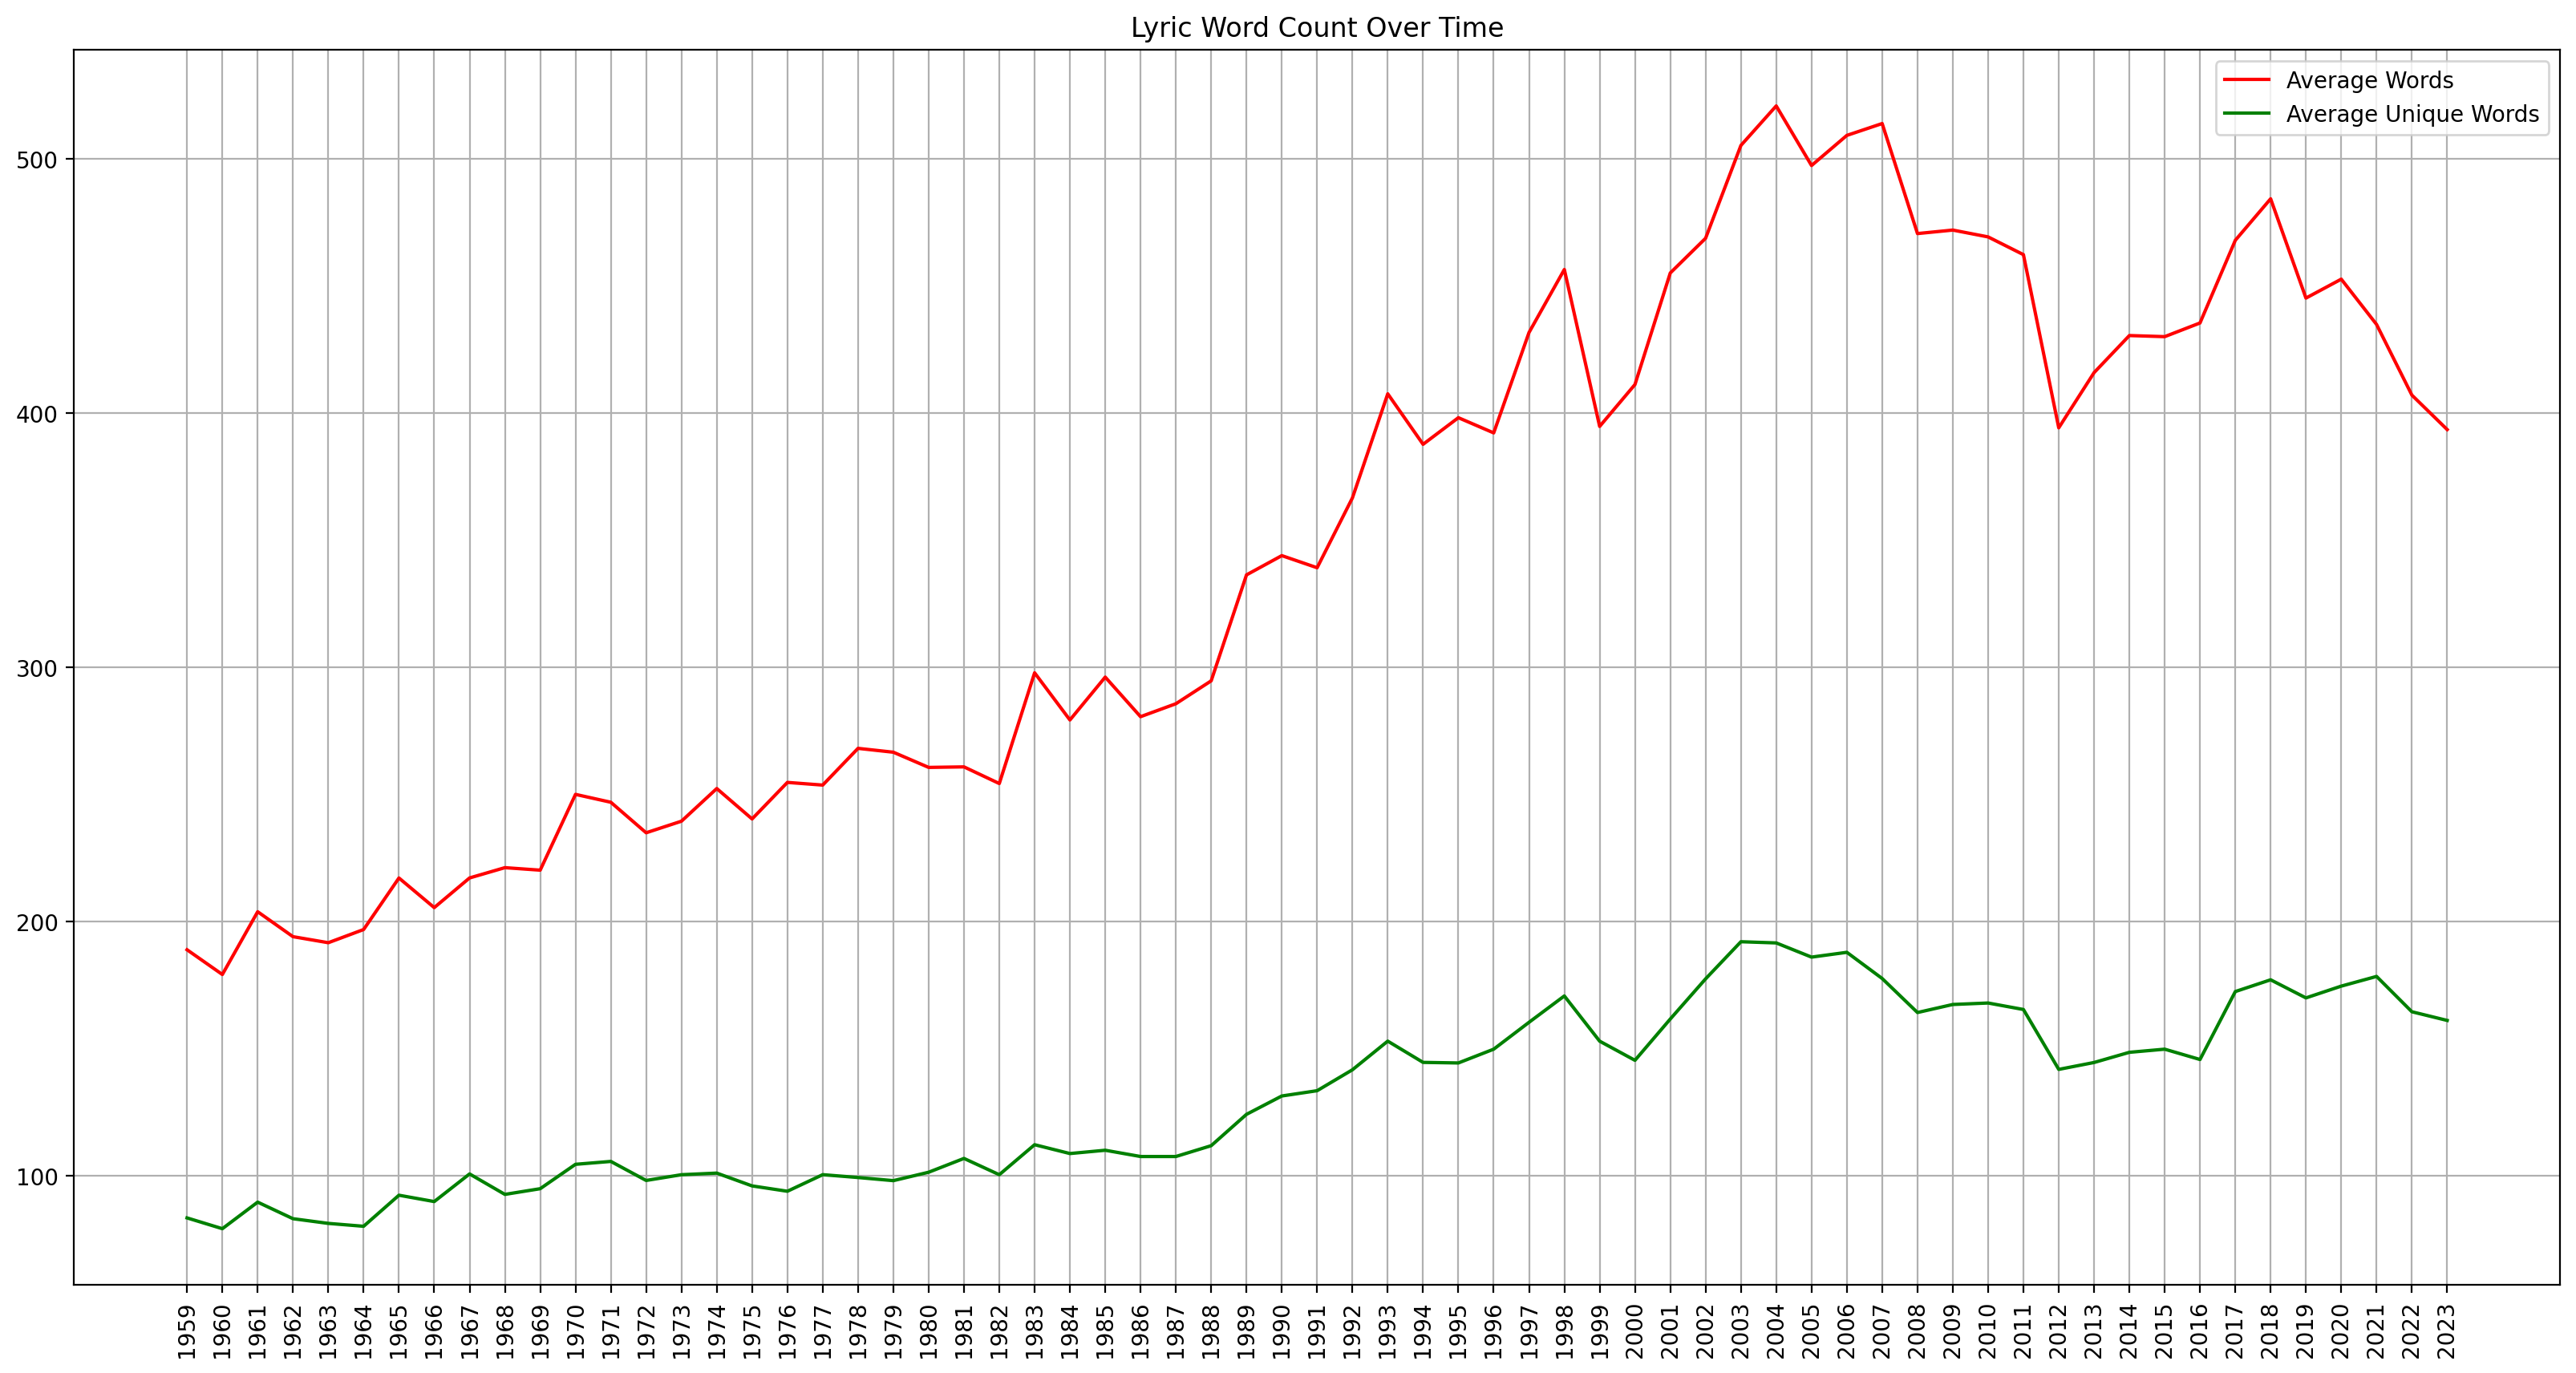

In [6]:
# Plotting the Numbers Above

plt.figure(figsize=(20, 10), dpi=200)
plt.title("Lyric Word Count Over Time")
plt.plot(summary_df['Year'], summary_df['Word Counts'], color="red", label="Average Words")
plt.plot(summary_df['Year'], summary_df['Unique Word Counts'], color="green", label="Average Unique Words")
plt.xticks(summary_df['Year'], rotation=90)
plt.grid()
plt.legend()
plt.show()

In [7]:
%pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
from collections import Counter

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Most Common Nouns: Oldest vs Newest Decades 

def count_year_pos(df,column_name,year):
    words = df.loc[df['Year'] == year, column_name]
    
    # Combine all words into a single Counter, skipping non-string values
    counts = Counter(word for pos in words if isinstance(pos, str) for word in pos.split())
    return counts

In [9]:
def combine_counters(frequencies, start_year, end_year):
    combined = Counter()
    for year in range(start_year, end_year + 1):
        if year in frequencies:
            combined.update(frequencies[year])
    return combined

In [10]:
allNounsByDecade= {}
for i in range(df['Year'].min(), df['Year'].max()+1):
    allNounsByDecade[i] = count_year_pos(df,'Nouns',i)

In [11]:
print("1960-1969 Most Common Nouns:\n",combine_counters(allNounsByDecade, 1960, 1969).most_common(10))
print()

1960-1969 Most Common Nouns:
 [('love', 1343), ('baby', 1276), ('girl', 711), ('day', 638), ('time', 633), ('heart', 540), ('way', 485), ('night', 435), ('man', 407), ('thing', 404)]



In [12]:
print("2010-2019 Most Common Nouns:\n",combine_counters(allNounsByDecade, 2010, 2019).most_common(10))
print()

2010-2019 Most Common Nouns:
 [('baby', 1849), ('love', 1443), ('girl', 1280), ('time', 1225), ('night', 921), ('way', 918), ('bitch', 776), ('life', 761), ('heart', 700), ('thing', 673)]



In [13]:
def WordCloudPlot(frequencies, title, max_words=250):   
    wc = WordCloud(width = 2000,height = 1000,max_words = max_words).generate_from_frequencies(frequencies)
    plt.figure(figsize=(40,25))
    plt.title(title,fontsize = 40)
    plt.imshow(wc)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

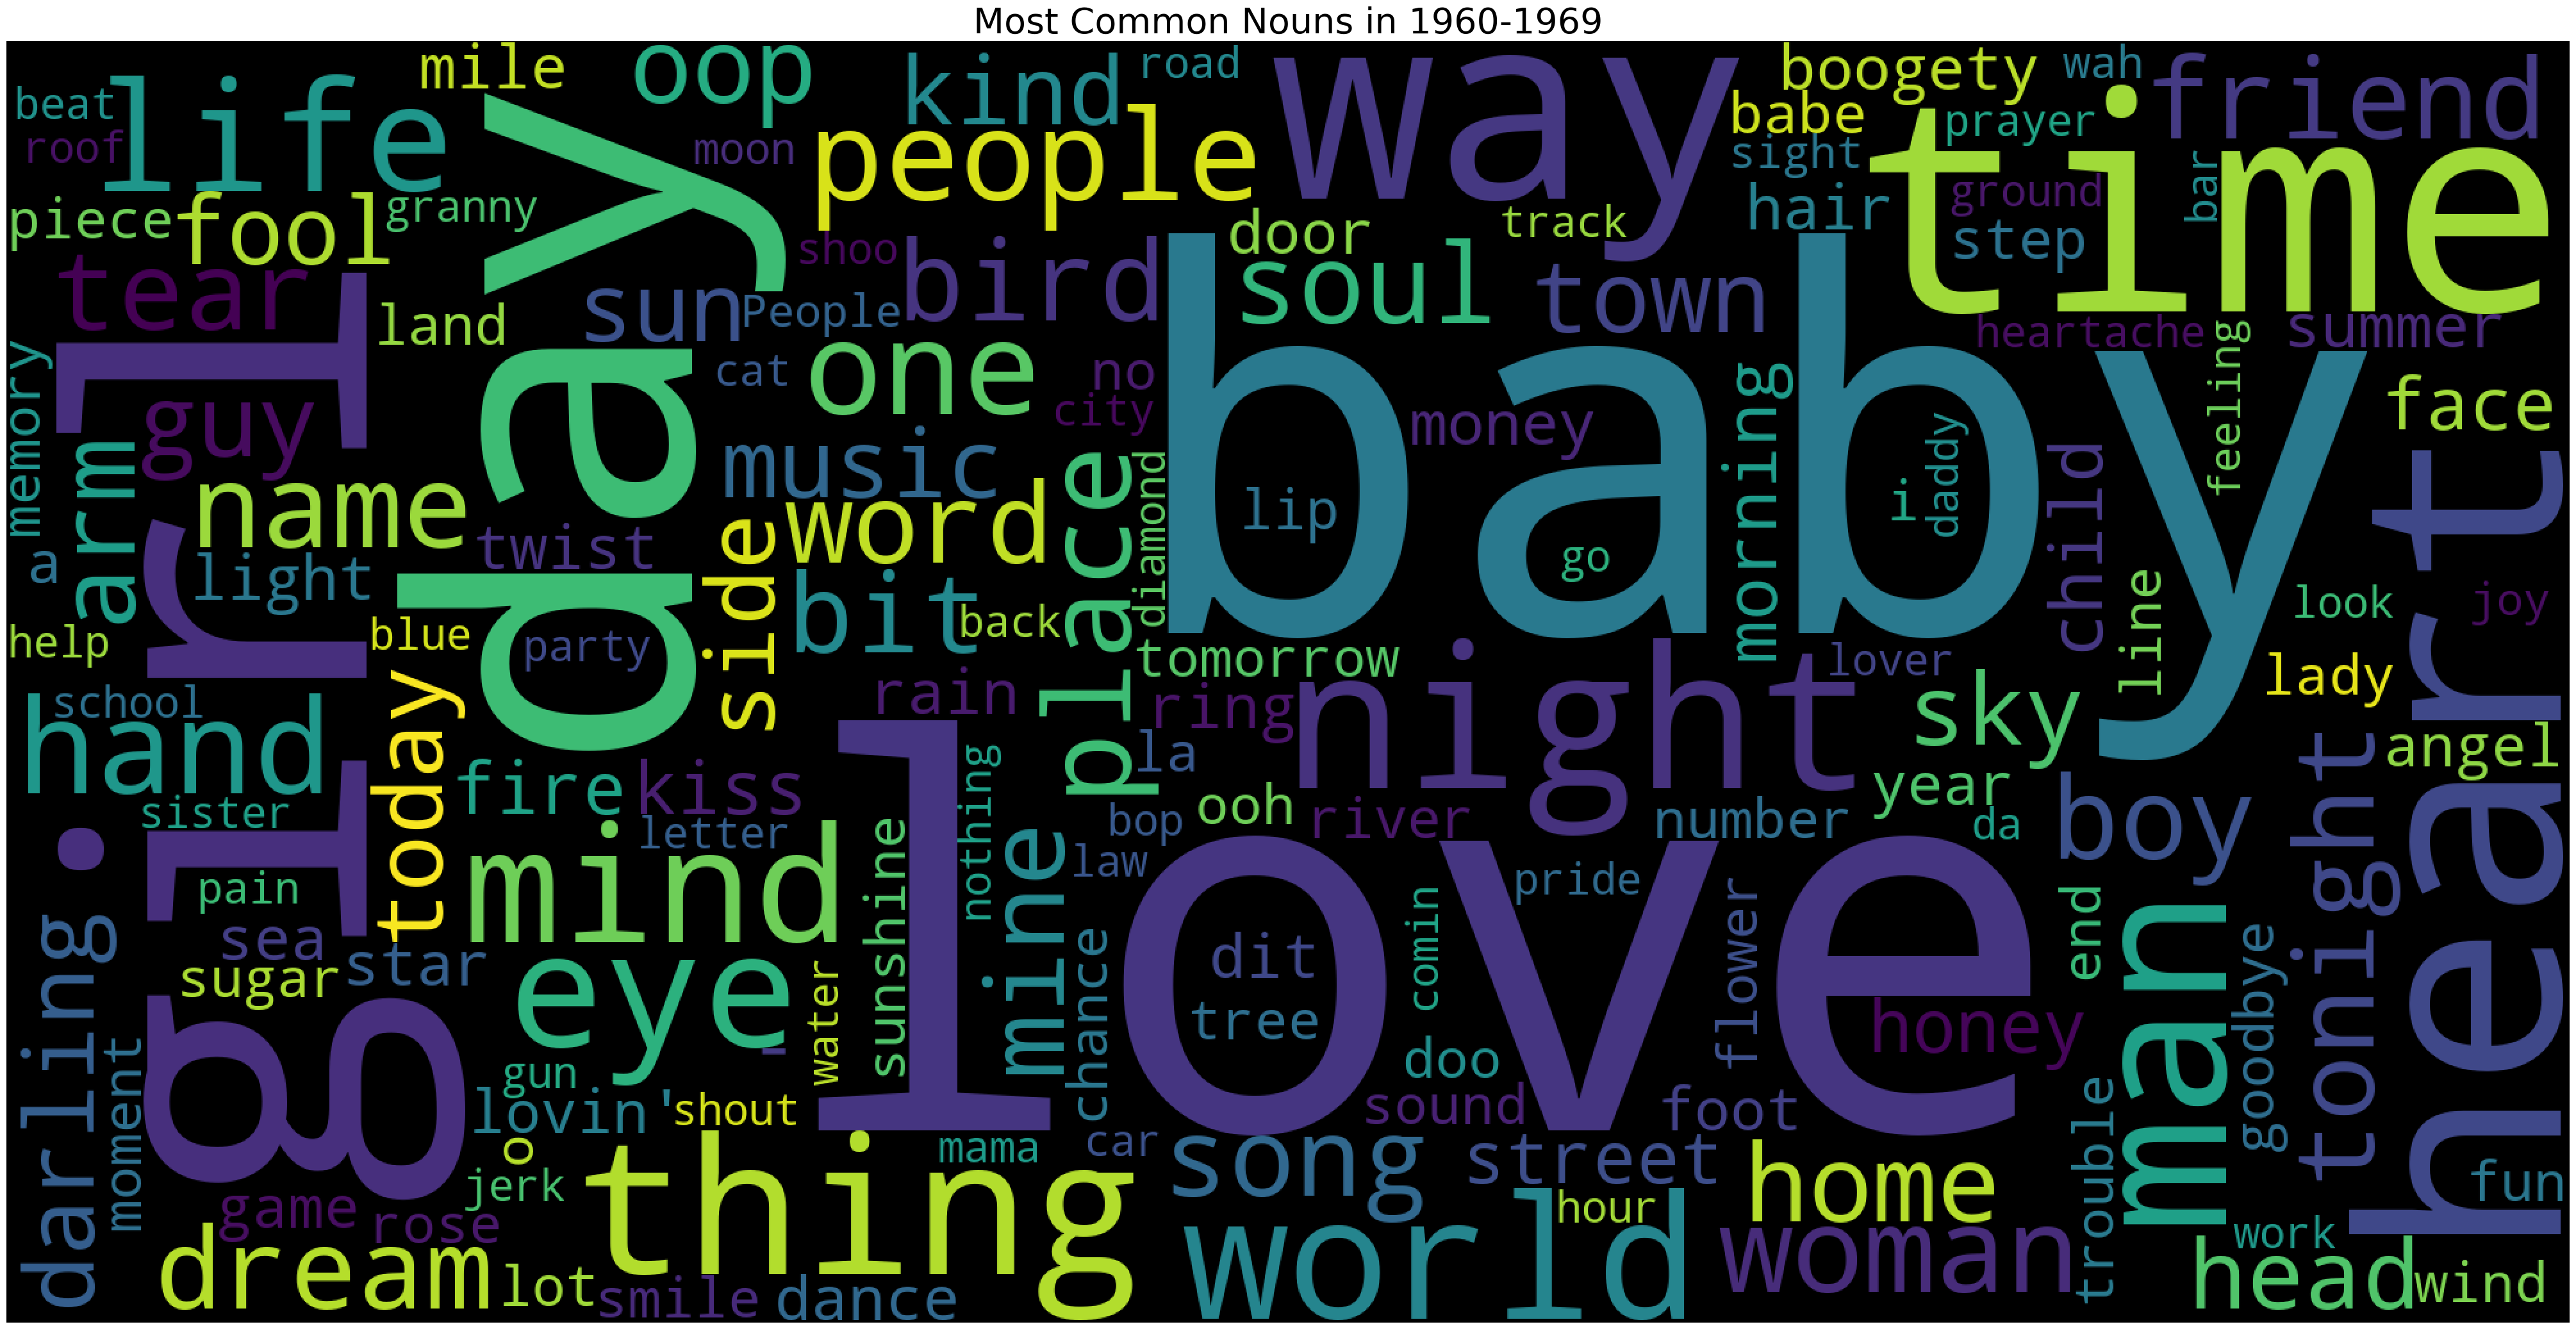

In [14]:

dec_1960s = combine_counters(allNounsByDecade, 1960, 1969)

WordCloudPlot(dec_1960s,'Most Common Nouns in 1960-1969', max_words = 150)

In [15]:
print("2010-2019 Most Common Nouns:\n",combine_counters(allNounsByDecade, 2010, 2019).most_common(10))
print()

2010-2019 Most Common Nouns:
 [('baby', 1849), ('love', 1443), ('girl', 1280), ('time', 1225), ('night', 921), ('way', 918), ('bitch', 776), ('life', 761), ('heart', 700), ('thing', 673)]



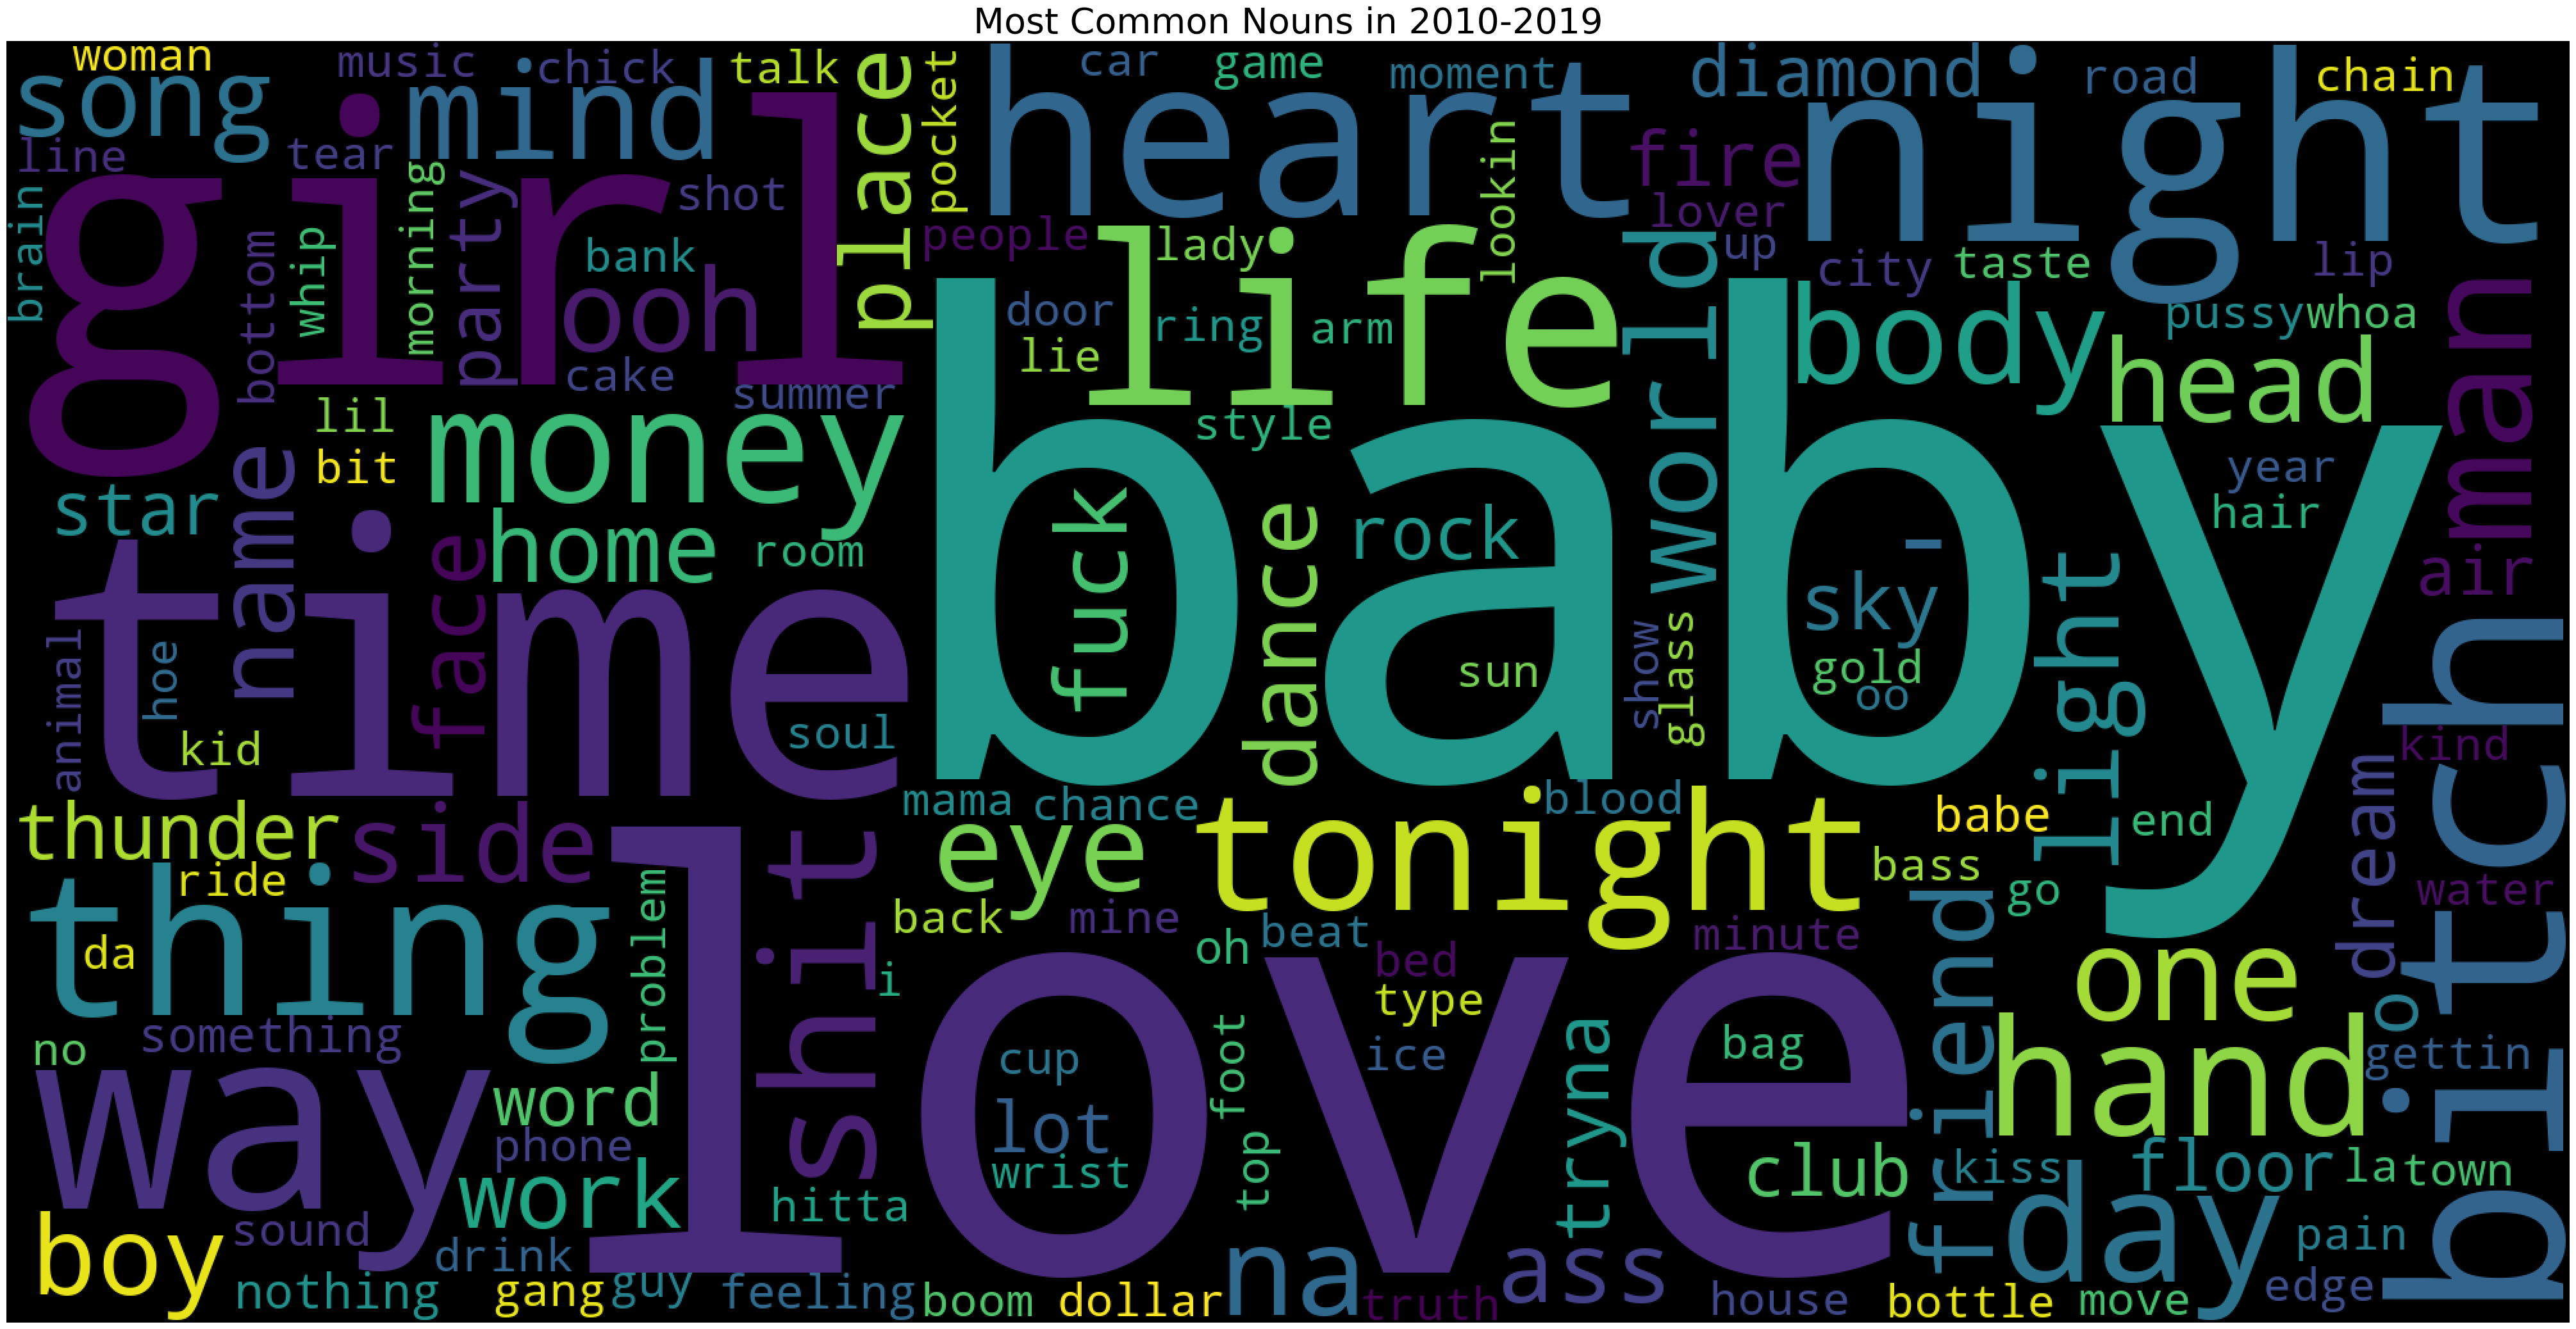

In [16]:
dec_2010s = combine_counters(allNounsByDecade, 2010, 2019)

del dec_2010s['niggas']
del dec_2010s['nigga']

WordCloudPlot(dec_2010s,'Most Common Nouns in 2010-2019', max_words = 150)

In [21]:
sub = df[['Year','Lyrics','Nouns','Adverbs','Corpus','Word Counts','Unique Word Counts']]
sub.head()

,Year,Lyrics,Nouns,Adverbs,Corpus,Word Counts,Unique Word Counts
0,1959,In 1814 we took a little trip Along with Colo...,trip bacon bean town gun comin while river of'...,along as ago once more so as ago once more the...,take little trip Colonel Jackson mighty Missis...,435,155
1,1959,"Oh the shark, babe Has such teeth, dear And he...",shark babe tooth jackknife babe sight shark to...,pearly just so never never now just just down ...,oh shark babe tooth dear show pearly white jac...,224,145
2,1959,Over and over I tried to prove my love to you ...,love friend fool fool personality personality ...,over over over over over over so over now over...,try prove love friend say fool fool cause get ...,215,55
3,1959,"Hey, Venus! Oh, Venus! Venus, if you will Ple...",girl girl kiss arm girl charm girl sunlight ha...,surely too always as long surely too always as...,hey Venus oh Venus Venus send little girl thri...,166,74
4,1959,I'm just a lonely boy Lonely and blue I'm all ...,boy nothing moment love night day boy nothing ...,just all just all just so hard just all,lonely boy lonely blue get think want love yes...,140,68


In [31]:
sub_count = sub.groupby('Year')['Word Counts'].mean().sort_values()
sub_count[2010]



469.39